In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datatime для работы с датами
import datetime
from datetime import datetime, date

# задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)     # задаем вывод в виде текста, а не HTML
pd.set_option('display.max_columns', 8)                # устанавливаем отображение максимального количества стобцов
pd.set_option('display.max_rows', 10)                  # устанавливаем отображение максимального количества строк
pd.set_option('display.width', 80)                     # устанавливаеv максимальную ширину отображения в символах

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# считываем данные из csv
sp500 = pd.read_csv('./sp500.csv', index_col = 'Symbol', usecols = [0, 2, 3, 7])
sp500.head(2)

             Sector   Price  Book Value
Symbol                                 
MMM     Industrials  141.14      26.668
ABT     Health Care   39.60      15.573

In [3]:
# считываем данные из csv
omh = pd.read_csv('./omh.csv')
omh.head(2)

         Date   MSFT    AAPL
0  2014-12-01  48.62  115.07
1  2014-12-02  48.46  114.63

__Выполнение арифметических операций над объектами DataFrame или Series__

In [4]:
# создаем объект DataFrame
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(5, 4), columns = ['A', 'B', 'C', 'D'])
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [5]:
# умножаем все на 2
df * 2

          A         B         C         D
0  0.938225 -0.565727 -3.018117 -2.271265
1  2.424224 -0.346429  0.238417 -2.088472
2 -1.723698 -4.209138 -0.989859  2.143608
3  1.443110 -1.413542 -2.079150  0.543720
4 -0.849945  1.134041  0.552464 -2.174801

In [6]:
# Построчное транслирование. Извлекается первая строка и затем вычитается из каждой строки DataFrame, по сути 
# вычисляя разницу между значениием каждой строки и значением первой строки
s = df.iloc[0]
diff = df - s
diff

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  0.743000  0.109649  1.628267  0.091396
2 -1.330961 -1.821706  1.014129  2.207436
3  0.252443 -0.423908  0.469484  1.407492
4 -0.894085  0.849884  1.785291  0.048232

In [7]:
# вычитаем объект DataFrame из объекта Series
diff2 = s - df
diff2

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -0.743000 -0.109649 -1.628267 -0.091396
2  1.330961  1.821706 -1.014129 -2.207436
3 -0.252443  0.423908 -0.469484 -1.407492
4  0.894085 -0.849884 -1.785291 -0.048232

In [8]:
# если метка преставляющая столбец, отсутствует либо в объекте DataFrame либо в объекте Series, соответствующий 
# столбец будет заполнен значением Nan 
s2 = s[1:3]
# добавляем E
s2['E'] = 0
# смотрим как производится выравнивание при операции
df + s2

    A         B         C   D   E
0 NaN -0.565727 -3.018117 NaN NaN
1 NaN -0.456078 -1.389850 NaN NaN
2 NaN -2.387433 -2.003988 NaN NaN
3 NaN -0.989634 -2.548633 NaN NaN
4 NaN  0.284157 -1.232826 NaN NaN

In [9]:
# При выполнении арифметических операций между двумя объектами DataFrame выравнивание происходит как по меткам
# индексов так и по меткам столбцов
# извлекаем строки в позициях с 1 по 3 и только столбцы В и С
subframe = df[1:4][['B', 'C']]
subframe

          B         C
1 -0.173215  0.119209
2 -2.104569 -0.494929
3 -0.706771 -1.039575

In [10]:
# демонстрация того как происходит выравнивание при вичитании
df - subframe

    A    B    C   D
0 NaN  NaN  NaN NaN
1 NaN  0.0  0.0 NaN
2 NaN  0.0  0.0 NaN
3 NaN  0.0  0.0 NaN
4 NaN  NaN  NaN NaN

In [11]:
# вычтем значение столбца А из значений каждого столбца
a_col = df['A']
df.sub(a_col, axis = 0)

     A         B         C         D
0  0.0 -0.751976 -1.978171 -1.604745
1  0.0 -1.385327 -1.092903 -2.256348
2  0.0 -1.242720  0.366920  1.933653
3  0.0 -1.428326 -1.761130 -0.449695
4  0.0  0.991993  0.701204 -0.662428

__Вычисление количества значений__


In [12]:
# метод .count вычисляет количество элементов, отличных от Nan 
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.count()

4

__Определение уникальных значений (и их встречаемости)__ 

In [13]:
# список уникальных значений в объекте Series можно получить с помощью метода .unique()
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [14]:
# количество уникальный значений (кроме NaN) в объекте Series можно получить с помощью метода .nunique()
s.nunique()

3

In [15]:
# чтобы включить значение NaN используем параметр dropna = False
s.nunique(dropna = False)

4

In [16]:
# встречаемость каждого уникального значения можно определить с помощью метода .value_counts()
s.value_counts(dropna = False)

a      2
b      1
c      1
NaN    1
dtype: int64

__Вычисление минимума и максимума__

In [17]:
# определяем минимальную цену для двух акций
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [18]:
# определяем максимальную цену для двух акций
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [19]:
# некоторые статистические методы в pandas называют косвенными статистиками, так как они возвращают не действительные значения,
# а косвенно связанные с ними значения. Например методы .idxmin() .idxmax() возвращают позиции индекса, в которых находятся 
# минимальное и максимальное значения
# определяем минимальную цену для обеих акций
omh[['MSFT', 'AAPL']].idxmin()

MSFT    11
AAPL    11
dtype: int64

In [20]:
# определяем максимальную цену для двух акций
omh[['MSFT', 'AAPL']].idxmax()

MSFT    3
AAPL    2
dtype: int64

__Вычисление n наименьших значений и n наибольших значений__

In [21]:
# вычисляем 4 наименьших значения
omh.nsmallest(4, ['MSFT'])['MSFT']

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [22]:
# вычисляем 4 наибольших значений 
omh.nlargest(4, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

In [23]:
# программный код для вычисления в Series несколько отличается от вышеприведенного кода
omh.MSFT.nlargest(3)

3    48.84
0    48.62
1    48.46
Name: MSFT, dtype: float64

__Вычисление накопленных значений__

In [24]:
# вычисляем накопленное произведение с помощью метода .cumprod()
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [25]:
# вычисляем накопленную сумму с помощью метода .cumsum()
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

### __Выполнение статистических операций с объектами библиотеки Pandas__

__Получение итоговых описательных статистик__

In [26]:
# метод .describe() возвращает сводку статистик для данных, записанных в объекте (количество значений, среднее значение, 
# стандартное отклонение, минимумб максимум, 25-й, 50-й, 75-й процентиль)
# получаем сводку статистик для DataFrame
omh.describe()

            MSFT        AAPL
count  22.000000   22.000000
mean   47.493182  112.411364
std     0.933077    2.388772
min    45.160000  106.750000
25%    46.967500  111.660000
50%    47.625000  112.530000
75%    48.125000  114.087500
max    48.840000  115.930000

In [27]:
# вычисляем сводку статистик для Series MSFT
omh.MSFT.describe()

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [28]:
# вычисляем толкьо среднее значение для MSFT
omh.MSFT.describe()['mean']

47.493181818181824

In [29]:
# получаем сводку для нечисловых данных ( общее количество элементов, количество уникакльных элементов, наиболее часто
# встречающееся значение, и встречаемость этого значения)
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

__Измерение центральной тенденции: среднее, медиана и мода__

Вычисление среднего значения

In [30]:
# среднее значение можно вычислить с помощью метода .mean()
omh.mean()

C:\Users\DS\AppData\Local\Temp\ipykernel_6292\441614741.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  omh.mean()


MSFT     47.493182
AAPL    112.411364
dtype: float64

In [31]:
# вычисляем значениеб усредненное по всем столбцам, для каждой строки
omh.mean(axis = 1)[:5]

C:\Users\DS\AppData\Local\Temp\ipykernel_6292\3515691498.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  omh.mean(axis = 1)[:5]


0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

Вычисление медианы

In [32]:
# медиану можно вычислить используя метод .median
omh.median()

C:\Users\DS\AppData\Local\Temp\ipykernel_6292\3580365939.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  omh.median()


MSFT     47.625
AAPL    112.530
dtype: float64

Вычисление моды

In [33]:
# вычисляем моду для серии
s = pd.Series([1, 2, 3, 3, 5])
s.mode()

0    3
dtype: int64

In [34]:
# вычисляем моду для серии, может быть несколько мод
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

__Вычисление дисперсии и стандартного отклонения__

Измерение дисперсии

In [35]:
# Дисперсия это разница между имеющимся значением и средним значением. Разница может быть положительной и отрицательной 
# поэтому мы возводим ее в квадрат, чтобы убедиться в том, что отрицательные значения оказывают кумулятивный эффект на
# результат. Затем эти значения суммируются и деляться на количество наблюдений минус 1, в итоге получаем
# аппроксимированное среднее значение различий
# вычислим дисперсию значений в каждом столбце с помощью метода .var()
omh.var()

C:\Users\DS\AppData\Local\Temp\ipykernel_6292\2830969321.py:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  omh.var()


MSFT    0.870632
AAPL    5.706231
dtype: float64

Вычисление стандартного отклонения

In [36]:
# вычисояем стандартное отклонение с помощью метода .std()
omh.std()

C:\Users\DS\AppData\Local\Temp\ipykernel_6292\1431112645.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  omh.std()


MSFT    0.933077
AAPL    2.388772
dtype: float64

Вычисление ковариации

In [37]:
# вычисляем ковариацию с помощью метода .cov()
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

Вычисление корреляции 

In [38]:
# вычисляем кореляцию  с помощью метода .corr()
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

__Дискретизация и квантилизация данных__

In [39]:
# генерируем 10 000 случайных чисел
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [40]:
# выводим среднее и стандарстное отклонение
(dist.mean(), dist.std())

(-0.002863324040906651, 1.008716203199891)

In [41]:
# с помощью функции pd.cut() разобъем нашу переменную на группы одинакового размера
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [42]:
# смотрим категории
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]], dtype='interval[float64, right]')

In [43]:
# свойство .codes возвращает массив, в котором указано, к какой группе (интервалу)был отнесен каждый элемент
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [44]:
# закрываем интервалы слева
pd.cut(dist, 5, right = False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)], dtype='interval[float64, left]')

In [45]:
# генерируем 50 значений возраста в диапазоне от 6 до 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [46]:
# разбиваем на диапазоны и выводим статистику по ним
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [47]:
# чтобы задать для каждой группы имя вместо стандартного математического обозначения, используем параметр labels
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels = labels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Aged      12   0.24

In [48]:
# Данные можно разбить в соответствии с указанными квантилями с помощью функции pd.qcut(). Эта функция разбивает значения на
# группы таким образом, чтобы каждая группа имела одинаковое количество элементов.
qbin = pd.qcut(dist, 5)
qbin.describe()


                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

__Вычисление ранга значений__

In [49]:
# Ранжирование помогает нам определить, проранжирован ли один из двух элементов выше или ниже другого.
# Занжирование сокращает количество значений, преобразуя их в последовательность чисел, измеренных в порядковой шкале (рангах)
# их можно использовать для оценки сложных критериев, основываясь на полученном порядке
# генерируем случайные числа
np.random.seed(123456)
s = pd.Series(np.random.randn(5), index=list('abcde'))
s

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
e    1.212112
dtype: float64

In [50]:
s.rank()

a    4.0
b    3.0
c    1.0
d    2.0
e    5.0
dtype: float64

__Вычисление процентного изменения для каждого наблюдения серии__

In [51]:
# Процентное изменение за определенное количество периодов можно вычислить с помощью метода .pct_change()
# Пример использования процентного изменения - вычисление скорости изменения цены на акцию
# вычисляем процентное изменение ждля MSFT
omh[['MSFT']].pct_change()[:5]

       MSFT
0       NaN
1 -0.003291
2 -0.007842
3  0.015807
4 -0.008600

__Выполнение операций со скользящим окном__

In [53]:
# с помощью скользящего окна можно вычислить заданную статистику для определенного интервала данных
# Затем окно перемещается по данным с определенным интервалом и пересчитывается заново
# Создаем случайное блуждание
np.random.seed(123456)
s = pd.Series(np.random.randn(1000)).cumsum()
s[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

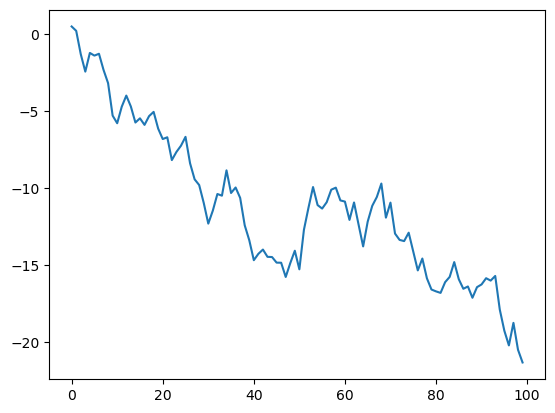

In [58]:
# Сфокусировавшись на первых ста значениях, мы можем увидеть изменение данных с помощью следующего графика
s[0:100].plot();

In [59]:
# Чтобы создать скользящее окно, потребуется объект Rolling, который получим с помощью метода .rolling(), указав ширину окна
# вычисляем скользящее окно шириной 3 дня 
r = s.rolling(window = 3)
r 

Rolling [window=3,center=False,axis=0,method=single]

In [60]:
# скользящее среднее по трем дням
means = r.mean()
means[:7]

0         NaN
1         NaN
2   -0.222483
3   -1.198334
4   -1.675860
5   -1.708105
6   -1.322070
dtype: float64

In [61]:
# проверяем, является ли значение средним первых трех чисел
s[:3].mean()

-0.22248276403642672

In [62]:
# среднее для меток с 1 по 3
s[1:4].mean()

-1.1983341702095498

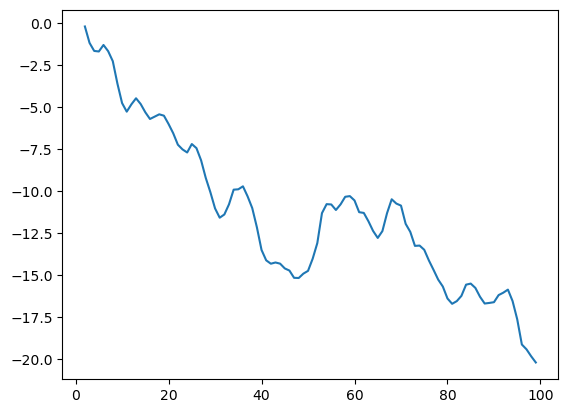

In [64]:
# строим график на основе 3-дневного скользящего среднего
means[0:100].plot();

__Создание случайной выборки данных__

In [71]:
# создаем датафрейм состоящий из 50 строк и 4 столбцов
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [73]:
# Отбираем три случайные строки с помощью метода .sample()
df.sample(n = 3)

           0         1         2         3
15 -0.076467 -1.187678  1.130127 -1.436737
28 -2.182937  0.380396  0.084844  0.432390
48 -0.693921  1.613616  0.464000  0.227371

In [74]:
# можно указать процент случайно отбираемых строк
# отбираем 10% строк
df.sample(frac = 0.1)

           0         1         2         3
37  1.126203 -0.977349  1.474071 -0.064034
10 -1.294524  0.413738  0.276662 -0.472035
4  -0.424972  0.567020  0.276232 -1.087401
14  0.410835  0.813850  0.132003 -0.827317
48 -0.693921  1.613616  0.464000  0.227371

In [75]:
# случайный отбор 10% наблюдениий с возвращением
df.sample(frac = 0.1, replace = True)

           0         1         2         3
27 -1.236269  0.896171 -0.487602 -0.082240
9   0.357021 -0.674600 -1.776904 -0.968914
27 -1.236269  0.896171 -0.487602 -0.082240
15 -0.076467 -1.187678  1.130127 -1.436737
9   0.357021 -0.674600 -1.776904 -0.968914